This Project we analyze a dataset from MarketCheck which holds information about the Used Car Market in the US.

Aggregated from over 65,000 dealer websites, the dataset contains ~7 million rows and 21 columns.

We'll be making use of ~2.5 million rows with 15 columns to conduct our analysis

Through the analysis, we aim to:

1. Get to know the 'Used Car Market in the US'.

2. Understand the Used Car Market for newer used cars from years 2010-2021.

3. Find insights and value by answering questions to help find the best deal for a car.

In [1]:
# IMPORT LIBRARIES
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm


In [2]:
# IMPORT DATASET
df_used = pd.read_csv('us-dealers-used.csv',  low_memory=False, nrows=2500000)

In [3]:
# show the number of rows and columns used for analysis
df_used.shape

(2500000, 21)

In [4]:
df_used.head()

,id,vin,price,miles,stock_no,year,make,model,trim,body_type,...,drivetrain,transmission,fuel_type,engine_size,engine_block,seller_name,street,city,state,zip
0,38b2f52e-8f5d,1GCWGFCF3F1284719,20998.0,115879.0,W1T503168C,2015.0,Chevrolet,Express Cargo,Work Van,Cargo Van,...,RWD,Automatic,E85 / Unleaded,4.8,V,nissan ellicott city,8569 Baltimore National Pike,Ellicott City,MD,21043
1,97ba4955-ccf0,WBY7Z8C59JVB87514,27921.0,7339.0,P33243,2018.0,BMW,i3,s,Hatchback,...,RWD,Automatic,Electric / Premium Unleaded,0.6,I,hendrick honda pompano beach,5381 N Federal Highway,Pompano Beach,FL,33064
2,be1da9fd-0f34,ML32F4FJ2JHF10325,11055.0,39798.0,WM2091A,2018.0,Mitsubishi,Mirage G4,SE,Sedan,...,FWD,Automatic,Unleaded,1.2,I,russ darrow toyota,2700 West Washington St.,West Bend,WI,53095
3,84327e45-6cb6,1GCPTEE15K1291189,52997.0,28568.0,9U2Y425A,2019.0,Chevrolet,Colorado,ZR2,Pickup,...,4WD,Automatic,Diesel,2.8,I,young kia,308 North Main Street,Layton,UT,84041
4,cde691c3-91dd,1G2AL18F087312093,NaN,188485.0,T36625A,2008.0,Pontiac,G5,Base,Coupe,...,FWD,Automatic,Unleaded,2.2,I,pappas toyota,10011 Spencer Rd,Saint Peters,MO,63376


In [5]:
df_used.describe().round(3)

,price,miles,year,engine_size
count,2270385.000,2474949.000,2499928.000,2448312.000
mean,27785.537,53168.938,2016.399,2.903
std,19256.314,45979.902,3.899,1.333
min,0.000,0.000,1980.000,0.600
25%,16995.000,21662.000,2015.000,2.000
50%,23997.000,38629.000,2018.000,2.400
75%,34900.000,74602.000,2019.000,3.600
max,1495000.000,2975291.000,2022.000,30.000


In [6]:
df_used.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500000 entries, 0 to 2499999
Data columns (total 21 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            object 
 1   vin           object 
 2   price         float64
 3   miles         float64
 4   stock_no      object 
 5   year          float64
 6   make          object 
 7   model         object 
 8   trim          object 
 9   body_type     object 
 10  vehicle_type  object 
 11  drivetrain    object 
 12  transmission  object 
 13  fuel_type     object 
 14  engine_size   float64
 15  engine_block  object 
 16  seller_name   object 
 17  street        object 
 18  city          object 
 19  state         object 
 20  zip           object 
dtypes: float64(4), object(17)
memory usage: 400.5+ MB


We will select 15 columns out of the original 21 columns that are relevant for our analysis

In [7]:
df_used = df_used[['vin', 'price', 'miles','year','make', 'model', 'body_type', 'vehicle_type',
                   'drivetrain', 'transmission', 'fuel_type', 'engine_size', 'city', 'state', 'zip']]

Let start cleaning our data by checking for missing values and duplicates 

First let's see how many null values exists in our dataset

In [8]:
df_used.isnull().sum()

vin                  0
price           229615
miles            25051
year                72
make                 0
model             4015
body_type        13922
vehicle_type     19210
drivetrain        7870
transmission      6744
fuel_type        22893
engine_size      51688
city              4208
state             4215
zip               4295
dtype: int64

Since price is the dependent we are trying to predict we only use observations with price.
We will also only used observations with the independent variable 'year' since one of the key factors to pricing

In [9]:
df_used = df_used[df_used['price'].notna()]
df_used = df_used[df_used['year'].notna()]
df_used = df_used[df_used['miles'].notna()]
df_used = df_used[df_used['engine_size'].notna()]

In [10]:
df_used["fuel_type"].fillna("Not Available", inplace = True)
df_used["model"].fillna("Not Available", inplace = True)
df_used["body_type"].fillna("Not Available", inplace = True)
df_used["vehicle_type"].fillna("Not Available", inplace = True)
df_used["drivetrain"].fillna("Not Available", inplace = True)
df_used["transmission"].fillna("Not Available", inplace = True)

df_used["city"].fillna("Not Available", inplace = True)
df_used["state"].fillna("Not Available", inplace = True)
df_used["zip"].fillna("Not Available", inplace = True)

In [11]:
df_used.isnull().sum()

vin             0
price           0
miles           0
year            0
make            0
model           0
body_type       0
vehicle_type    0
drivetrain      0
transmission    0
fuel_type       0
engine_size     0
city            0
state           0
zip             0
dtype: int64

In [12]:
df_used['year'] = df_used['year'].astype(int)

In [13]:
df_used['year']

0          2015
1          2018
2          2018
3          2019
6          2000
           ... 
2499995    2008
2499996    2013
2499997    2010
2499998    2012
2499999    2015
Name: year, Length: 2218224, dtype: int64

In [14]:
df_used.isnull().sum()

vin             0
price           0
miles           0
year            0
make            0
model           0
body_type       0
vehicle_type    0
drivetrain      0
transmission    0
fuel_type       0
engine_size     0
city            0
state           0
zip             0
dtype: int64

Let's see what duplicates exist for relevant columns and remove them. Since 'vin' is a unique identification of each vehicle we only need one instance of a car.

In [15]:
df_used['vin'].duplicated().sum()

1143149

In [16]:
df_used.drop_duplicates(subset=['vin'], inplace=True)

In [17]:
df_used['vin'].duplicated().sum()

0

In [18]:
df_used.shape

(1075075, 15)

Since we are only looking for used cars from 2010-2021 we'll filter the dataframe for only those years.

In [19]:
df_used = df_used.loc[(df_used['year'] > 2009) & (df_used['year'] < 2022) ]

In [20]:
car_yrs = df_used.year.unique()
car_yrs.sort()
print(car_yrs)

[2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021]


In [21]:
df_used['price'][df_used['price'] > 120000].count()

3066

In [22]:
df_used = df_used.loc[df_used['price'] <= 120000]

In [23]:
df_used['miles'][df_used['miles'] > 160000].count()

16854

There are multiple names for the same fuel type. We will designate each fuel type categorically

In [24]:
result = []
for i in df_used['fuel_type']:
    if i == 'Unleaded' or i == 'Unleaded / Unleaded':
        result.append('Unleaded')
    
    elif i == 'Premium Unleaded' or i == 'Premium Unleaded; Unleaded' or i == 'Premium Unleaded / Unleaded':
        result.append('Premium')
    
    elif i == 'E85 / Unleaded' \
    or i == 'E85 / Unleaded; Premium Unleaded' \
    or i == 'E85 / Unleaded; Unleaded / Unleaded' \
    or i == 'E85 / Unleaded; Unleaded' \
    or i == 'E85 / Premium Unleaded; E85 / Unleaded' \
    or i == 'E85; E85 / Unleaded' \
        or i == 'E85':
        result.append('E85') 
    
    elif i == 'Diesel' \
    or i == 'Diesel; Unleaded' \
    or i == 'Diesel / Premium Unleaded' \
    or i == 'Diesel; E85 / Unleaded':
        result.append('Diesel')
    
    elif i == 'Electric / Unleaded' \
    or i == 'Electric / Premium Unleaded'\
    or i == 'Electric / Hydrogen' \
    or i == 'Electric / Premium Unleaded; Premium Unleaded' \
    or i == 'Electric / Premium Unleaded; Electric / Unleaded' \
    or i == 'Electric / E85':
        result.append('Hybrid')
    
    elif i == 'Electric':
        result.append('Electric')
    elif i == 'Compressed Natural Gas' \
    or i == 'Compressed Natural Gas / Unleaded' \
    or i == 'Compressed Natural Gas; Unleaded' \
    or i == 'Hydrogen':
        result.append('Compressed Natural Gas')
    else:
        result.append('Not Available')

df_used['new_fuel_type'] = result
print(df_used)

                       vin    price     miles  year        make  \
0        1GCWGFCF3F1284719  20998.0  115879.0  2015   Chevrolet   
1        WBY7Z8C59JVB87514  27921.0    7339.0  2018         BMW   
2        ML32F4FJ2JHF10325  11055.0   39798.0  2018  Mitsubishi   
3        1GCPTEE15K1291189  52997.0   28568.0  2019   Chevrolet   
7        3GNBABDBXAS598032   6500.0   74274.0  2010   Chevrolet   
...                    ...      ...       ...   ...         ...   
2499976  19XFB2F57FE221582  11792.0   87234.0  2015       Honda   
2499986  19XFB2F84CE372899  12990.0   91941.0  2012       Honda   
2499990  19XFB2F5XFE701616  14988.0   59075.0  2015       Honda   
2499994  2HGFA1F62BH541849   6995.0  195369.0  2011       Honda   
2499999  19XFB2F81FE074573  14299.0   70424.0  2015       Honda   

                 model  body_type vehicle_type drivetrain transmission  \
0        Express Cargo  Cargo Van        Truck        RWD    Automatic   
1                   i3  Hatchback          Car 

In [25]:
df_used.shape

(995832, 16)

In [26]:
df_used.describe().round(2)

,price,miles,year,engine_size
count,995832.00,995832.00,995832.00,995832.00
mean,26863.56,51237.78,2016.96,2.94
std,14249.45,40224.59,2.54,1.33
min,0.00,0.00,2010.00,0.60
25%,16995.00,22602.00,2016.00,2.00
50%,23880.00,39135.50,2018.00,2.50
75%,33990.00,73004.00,2019.00,3.60
max,120000.00,1752335.00,2021.00,30.00


<AxesSubplot:>

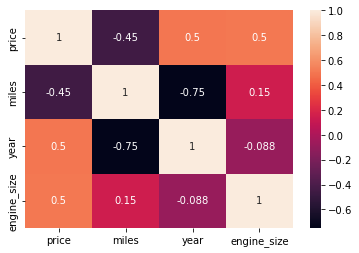

In [41]:
df_used_corr = df_used.corr(method='pearson')
sns.heatmap(df_used_corr, annot=True)

In [28]:
df_corr = df_used.corr()
df_corr

,price,miles,year,engine_size
price,1.000000,-0.452798,0.497166,0.504632
miles,-0.452798,1.000000,-0.748021,0.146360
year,0.497166,-0.748021,1.000000,-0.088375
engine_size,0.504632,0.146360,-0.088375,1.000000


In [29]:
Q1 = df_used.quantile(0.25)
Q3 = df_used.quantile(0.75)
IQR = Q3 - Q1

print(IQR)

price          16995.0
miles          50402.0
year               3.0
engine_size        1.6
dtype: float64


In [30]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
outliers = df_used[((df_used < lower_limit) | (df_used > upper_limit)).any(axis=1)]
print(outliers)

/var/folders/5m/q9v7gbbs36s__cc1qbvl9vfr0000gn/T/ipykernel_22585/2907848334.py:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = df_used[((df_used < lower_limit) | (df_used > upper_limit)).any(axis=1)]


                       vin     price     miles  year           make  \
7        3GNBABDBXAS598032    6500.0   74274.0  2010      Chevrolet   
8        5YMCY0C08L9D04057  105974.0    9589.0  2020            BMW   
12       WDDDJ7CB9BA170249   16995.0  110615.0  2011  Mercedes-Benz   
18       3C6UR5FJ2HG558595   45999.0   70954.0  2017            RAM   
22       1C4SDJGJ2JC366348   55595.0   28904.0  2018          Dodge   
...                    ...       ...       ...   ...            ...   
2499854  2HGFA1F92AH525935   14590.0   61849.0  2010          Honda   
2499856  19XFA1F59AE027237    5500.0  180623.0  2010          Honda   
2499918  2HGFB2F52CH513092    4950.0  206000.0  2012          Honda   
2499947  2HGFA1F52BH500385    8300.0   61030.0  2011          Honda   
2499994  2HGFA1F62BH541849    6995.0  195369.0  2011          Honda   

                   model body_type vehicle_type drivetrain transmission  \
7                    HHR  Mini Mpv          Car        FWD    Automatic 

In [31]:
df_no_outliers = df_used[~((df_used < lower_limit) | (df_used > upper_limit)).any(axis=1)]
print(df_used)

/var/folders/5m/q9v7gbbs36s__cc1qbvl9vfr0000gn/T/ipykernel_22585/2871251487.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_no_outliers = df_used[~((df_used < lower_limit) | (df_used > upper_limit)).any(axis=1)]


                       vin    price     miles  year        make  \
0        1GCWGFCF3F1284719  20998.0  115879.0  2015   Chevrolet   
1        WBY7Z8C59JVB87514  27921.0    7339.0  2018         BMW   
2        ML32F4FJ2JHF10325  11055.0   39798.0  2018  Mitsubishi   
3        1GCPTEE15K1291189  52997.0   28568.0  2019   Chevrolet   
7        3GNBABDBXAS598032   6500.0   74274.0  2010   Chevrolet   
...                    ...      ...       ...   ...         ...   
2499976  19XFB2F57FE221582  11792.0   87234.0  2015       Honda   
2499986  19XFB2F84CE372899  12990.0   91941.0  2012       Honda   
2499990  19XFB2F5XFE701616  14988.0   59075.0  2015       Honda   
2499994  2HGFA1F62BH541849   6995.0  195369.0  2011       Honda   
2499999  19XFB2F81FE074573  14299.0   70424.0  2015       Honda   

                 model  body_type vehicle_type drivetrain transmission  \
0        Express Cargo  Cargo Van        Truck        RWD    Automatic   
1                   i3  Hatchback          Car 

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.,  70000.]),
 [Text(-10000.0, 0, '−10000'),
  Text(0.0, 0, '0'),
  Text(10000.0, 0, '10000'),
  Text(20000.0, 0, '20000'),
  Text(30000.0, 0, '30000'),
  Text(40000.0, 0, '40000'),
  Text(50000.0, 0, '50000'),
  Text(60000.0, 0, '60000'),
  Text(70000.0, 0, '70000')])

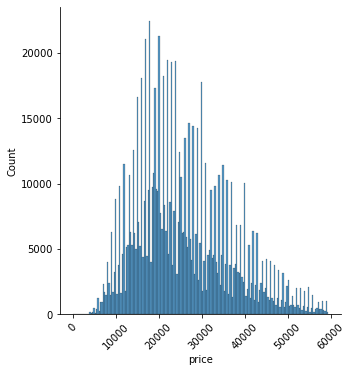

In [32]:
sns.displot(df_no_outliers['price'])
plt.xticks(rotation=45)

(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.,
        120000., 140000., 160000.]),
 [Text(-20000.0, 0, '−20000'),
  Text(0.0, 0, '0'),
  Text(20000.0, 0, '20000'),
  Text(40000.0, 0, '40000'),
  Text(60000.0, 0, '60000'),
  Text(80000.0, 0, '80000'),
  Text(100000.0, 0, '100000'),
  Text(120000.0, 0, '120000'),
  Text(140000.0, 0, '140000'),
  Text(160000.0, 0, '160000')])

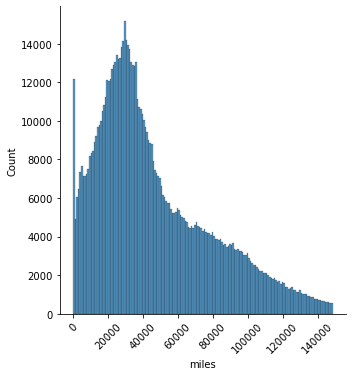

In [33]:
sns.displot(df_no_outliers['miles'])
plt.xticks(rotation=45)

(array([2010., 2012., 2014., 2016., 2018., 2020., 2022.]),
 [Text(2010.0, 0, '2010'),
  Text(2012.0, 0, '2012'),
  Text(2014.0, 0, '2014'),
  Text(2016.0, 0, '2016'),
  Text(2018.0, 0, '2018'),
  Text(2020.0, 0, '2020'),
  Text(2022.0, 0, '2022')])

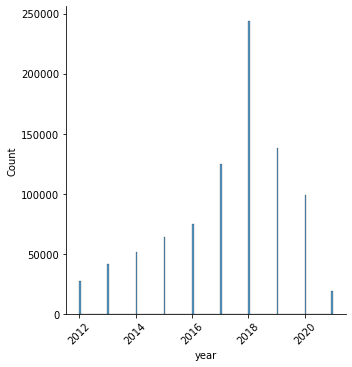

In [34]:
sns.displot(df_no_outliers['year'])
plt.xticks(rotation=45)

In [35]:
df_no_outliers.columns

Index(['vin', 'price', 'miles', 'year', 'make', 'model', 'body_type',
       'vehicle_type', 'drivetrain', 'transmission', 'fuel_type',
       'engine_size', 'city', 'state', 'zip', 'new_fuel_type'],
      dtype='object')

In [36]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 882480 entries, 0 to 2499999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   vin            882480 non-null  object 
 1   price          882480 non-null  float64
 2   miles          882480 non-null  float64
 3   year           882480 non-null  int64  
 4   make           882480 non-null  object 
 5   model          882480 non-null  object 
 6   body_type      882480 non-null  object 
 7   vehicle_type   882480 non-null  object 
 8   drivetrain     882480 non-null  object 
 9   transmission   882480 non-null  object 
 10  fuel_type      882480 non-null  object 
 11  engine_size    882480 non-null  float64
 12  city           882480 non-null  object 
 13  state          882480 non-null  object 
 14  zip            882480 non-null  object 
 15  new_fuel_type  882480 non-null  object 
dtypes: float64(3), int64(1), object(12)
memory usage: 114.5+ MB


In [37]:
df_no_outliers.shape

(882480, 16)

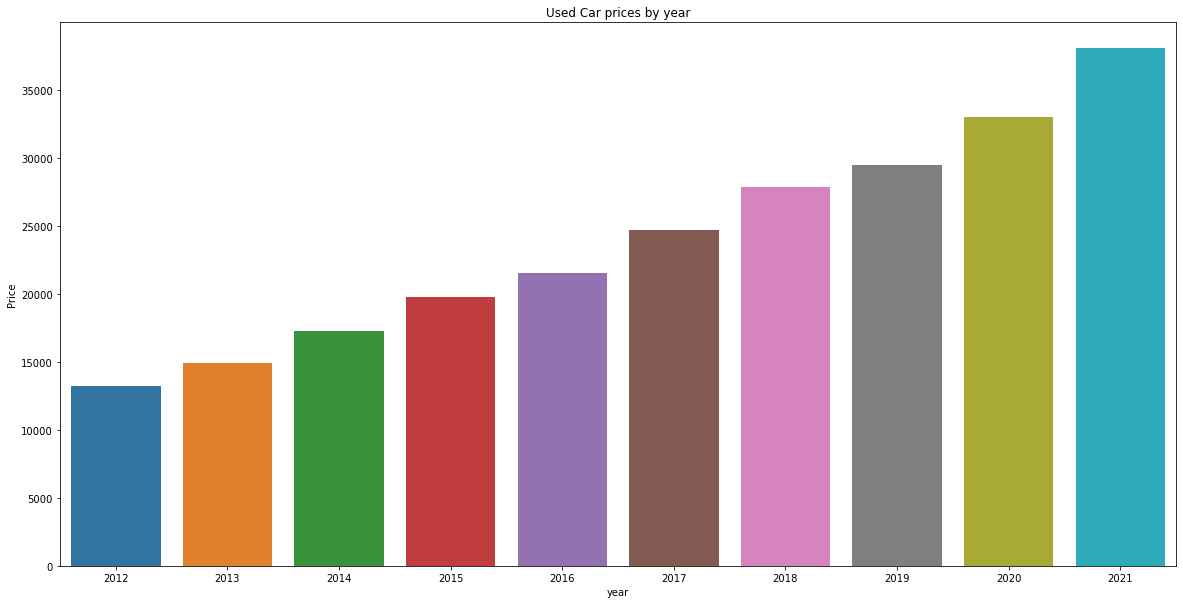

In [43]:
price_by_year = df_no_outliers.groupby('year')['price'].mean()

plt.figure(figsize=(20,10))
sns.barplot(x= price_by_year.index, y= price_by_year.values)
plt.title("Used Car prices by year")
plt.ylabel("Price")
plt.show()

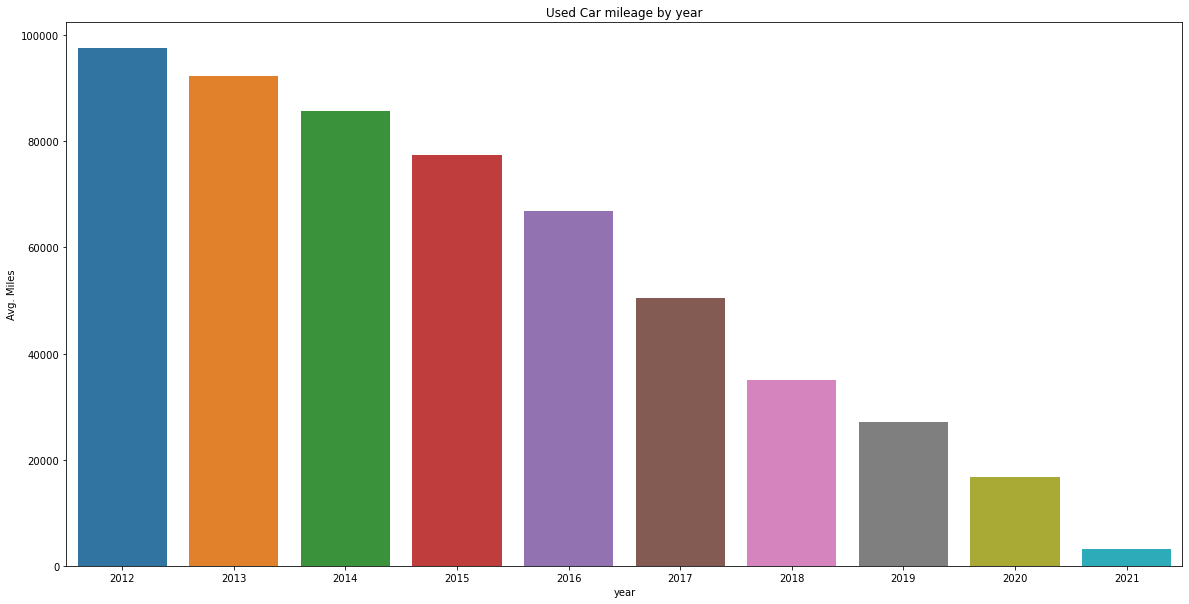

In [47]:
miles_by_year = df_no_outliers.groupby('year')['miles'].mean()

plt.figure(figsize=(20,10))
sns.barplot(x= miles_by_year.index, y= miles_by_year.values)
plt.title("Used Car mileage by year")
plt.ylabel("Avg. Miles")
plt.show()

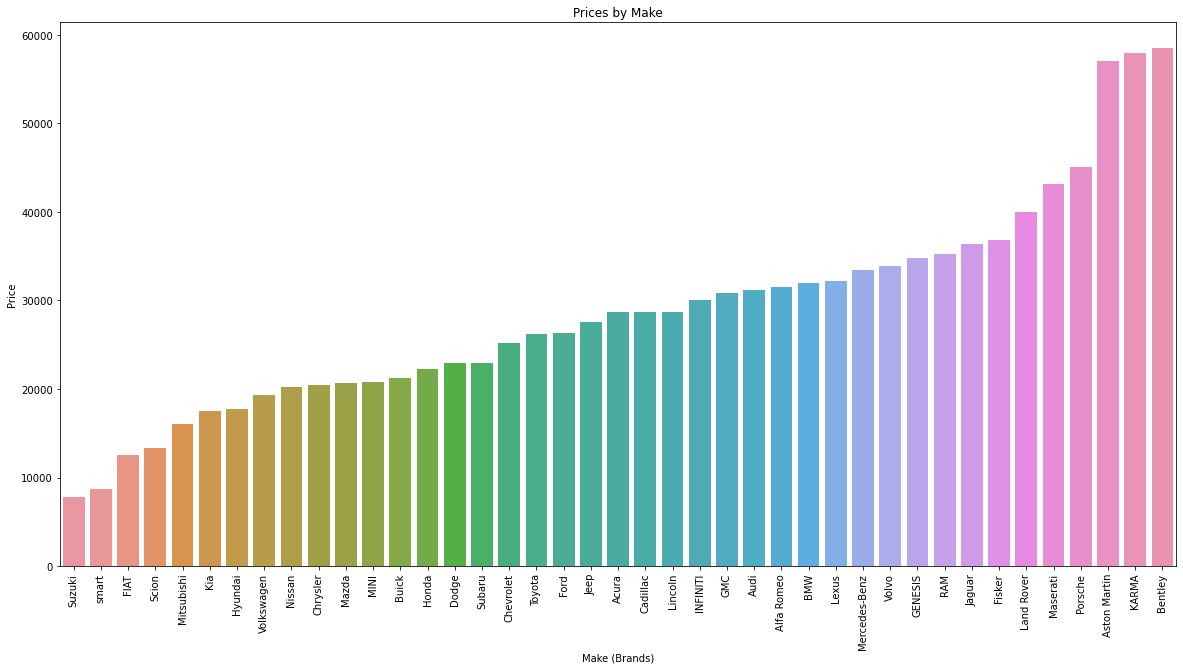

In [46]:
price_by_make = df_no_outliers.groupby('make')['price'].mean().sort_values()


plt.figure(figsize=(20,10))
sns.barplot(x= price_by_make.index, y= price_by_make.values)
plt.title("Prices by Make")
plt.ylabel("Price")
plt.xlabel("Make (Brands)")
plt.xticks(rotation=90)
plt.show()

In [38]:
ind_var = df_no_outliers[['miles', 'year','engine_size']]

dep_var = df_no_outliers['price']

ind_var = sm.add_constant(ind_var)
model_fit = sm.OLS(dep_var, ind_var).fit()
print(model_fit.summary())



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                 4.017e+05
Date:                Wed, 16 Mar 2022   Prob (F-statistic):               0.00
Time:                        09:52:49   Log-Likelihood:            -9.0750e+06
No. Observations:              882480   AIC:                         1.815e+07
Df Residuals:                  882476   BIC:                         1.815e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -3.41e+06   1.06e+04   -320.254      

/Users/hseo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


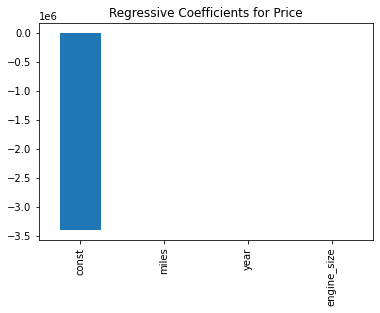

In [39]:
model_bar = model_fit.params
model_bar = model_bar.sort_values(ascending=True)
model_bar.plot(y = 'Price', kind='bar', 
               title= 'Regressive Coefficients for Price', legend=False)
plt.show()


In [44]:
df_no_outliers.to_csv('used_cars.csv', encoding='utf-8', index=False)